# Week 4 Quiz

## Ruijing Zhang - rz2559


### Instructions

Replace the Name and UNI in cell above and the notebook name

Replace all '____' below using the instructions provided.

When completed, 
 - make sure you've replaced Name and UNI in the first cell and filename (eg: week_04_quiz-hw2592)
 - Click the github link shared on canvas for quiz4 to generate your own repository of quiz4
 - Click your own repository of quiz4 to commit your answers to github

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

%matplotlib inline

We're going to calculate the 95% confidence interval for the mean value of 'magnesium' from our wine dataset.

In [19]:
# Read in ../data/wine_dataset.csv as df
df = pd.read_csv('../../data/wine_dataset.csv')

# print .info() on df for a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

(80.0, 110.0)

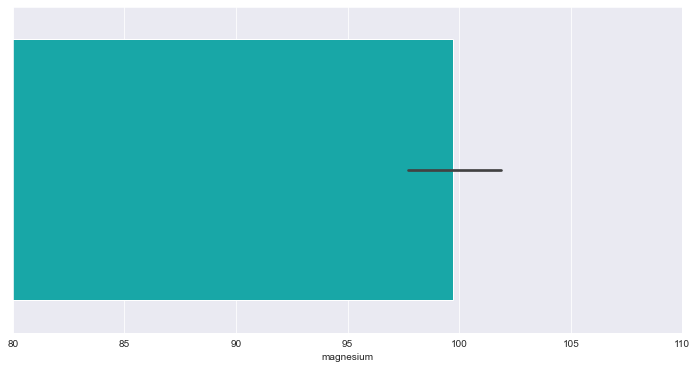

In [20]:
# Generate a barplot of the 'magnesium' column with 95% confidence intervals using sns.barplot()
# These are the CI values we're going to calculate below.
# Capture the axis of the plot in ax
fig,ax = plt.subplots(1,1,figsize=(12,6))
ax = sns.barplot(x = 'magnesium',data= df,
           estimator=np.mean, # default
            ci=95,              # 95% CI
            color='c')


# To zoom in, set the xlimits using ax.set_xlim(80,110)
ax.set_xlim(80,110)

In [28]:
# Assign the mean value of magnesium to variable observed_mean
observed_mean = df[['magnesium']].mean()

# Print the observed mean with a precision of 2
print(round(observed_mean,2))

magnesium    99.74
dtype: float64


In [30]:
# generate a bootstrap sample of df.magnesium (with the same number of values as the original dataset)
#   using .sample() (with replacement) 
#   using random_state=123 so our answers will match
#   assign the result to sample
sample = df.magnesium.sample(n=len(df.magnesium), # same size as number of observations,
                                        replace=True,            # sample with replacement
                                        random_state=123         # for reproducability
                                       )

# Print the mean of the sample with a precision of 2
# Note: if the sample mean is the same as the observed mean, 
#       check, are you sampling with replacement?
sample_mean = df[['magnesium']].mean()
print (round(sample_mean,2))

magnesium    99.74
dtype: float64


In [35]:
# Generate 1000 additional sample means using bootstrap sampling from the 'magnesium' column
#   each sample should have the same number of values as the original dataframe
#   sample with replacement
#   do not use random_state for this step (your results may differ from the course solution slightly)
#   store in the list sample_means

# tqdm gives us a progress bar when looping
from tqdm.notebook import tqdm 
num_iterations = 1000
sample_means = []

for i in tqdm(range(num_iterations)):
    # 1. draw a random sample of size *n* from the data
    random_sample = df.magnesium.sample(n=df.magnesium.shape[0], # or frac=1
                                            replace=True
                                           )
    # 2. record the sample statistic from this random sample
    sample_means.append(random_sample.mean())
    
# convert into a numpy array
sample_means = np.array(sample_means)
    
# Print the first 5 values in sample_means
print(sample_means[:5])

  0%|          | 0/1000 [00:00<?, ?it/s]

[ 99.53932584 100.3988764  100.06741573  99.68539326 100.03932584]


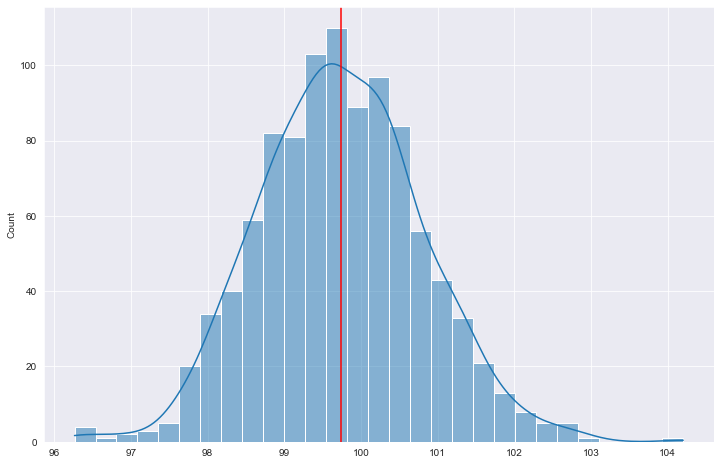

In [38]:
# Plot the distribution of sample means using sns.histplot
# Store the returned axis in ax
fig,ax = plt.subplots(1,1,figsize=(12,8))

ax = sns.histplot(x=sample_means,kde=True)

# Add a vertical line located at the observed mean on the x-axis using ax.axvline()
#   Set the color of the line to 'red'
# The observed_mean should fall near the center of the distribution.

ax.axvline(df.magnesium.mean(), color='r');

In [40]:
# To get the 95% confidence interval, we want to retain the central 95% of our sample_means.
# To do this we need to first determine how many values must be trimmed from the ends of the sorted array.
# For 95% CI, we want to trim 1/2 of 5% from each end.
# Calculate 2.5% of the length of sample_means and store as trim_amount.

# calculate where to trim
trim_amount = .5*(1-.95) * num_iterations


# print the trim_amount, the number of elements we'll trim from each end of the sorted list
trim_amount

25.00000000000002

In [41]:
# We want to index into our sample_means, but trim_amount is a float.
# We must be first round this value and converted to an integer.
# Use np.round() to round and int() to convert to int and store the result in trim_idx.
trim_idx = int(np.round(trim_amount))

# Print trim_idx
trim_idx

25

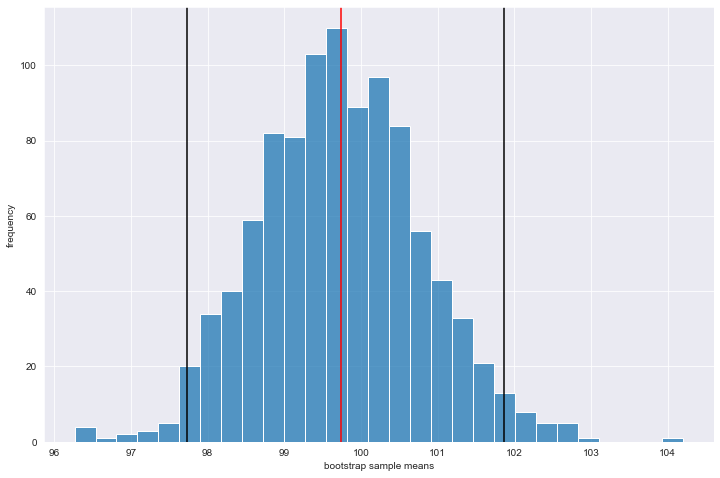

In [43]:
# We can now print the 95% CI for our measure by indexing into the sorted array of sample_means.
# Use np.sort() to return a sorted numpy array 
#   then use a list of the indices we want, [trim_idx,-trim_idx-1], to use "fancy indexing" on this sorted array.
# Store the 95% CI values as ci
ci = np.sort(sample_means)[[trim_idx,-trim_idx-1]]

# Print the ci values and visually compare the endpoints of the CI in the barplot above.
ci

fig,ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.histplot(sample_means)
ax.axvline(df.magnesium.mean(), color='r');
ax.axvline(ci[0],color='k')
ax.axvline(ci[1],color='k')
ax.set_xlabel('bootstrap sample means');
ax.set_ylabel('frequency');